# 5.4. Regresja logistyczna w 2D

Podstawowym algorytmem, który używany jest do klasyfikacji danych, jest regresja logistyczna. Omówmy sobie jej podstawy, a na koniec spróbujmy wykorzystać ją do uproszczonego problemu klasyfikacji.

## Algorytm regresji logistycznej

Regresja logistyczna w swojej podstawowej formie, jest w stanie przewidywać problemy binarne, tzn. takie, w których istnieje dwie możliwe wartości etykiet - typowo notowane jako $ 0 $ i $ 1 $. Metoda ta modeluje prawdopodobieństwo tego, że dany obiekt należy do klasy pozytywnej. W związku z tym, jesteśmy w stanie, bazując na tym prawdopodobieństwie, dokonać przypisania obserwacji do jednej z dwóch klas.

Modelowanie odbywa się za pomocą dopasowania funkcji logistycznej w taki sposób, aby zmaksymalizować to prawdopodobieństwo dla przykładów ze zbioru treningowego.

W ogólności, wzór funkcji logistycznej ma następujący wzór:

$$ f(x)={\frac {L}{1+e^{-k(x-x_{0})}}} $$

$ L $ - maksymalna wartość funkcji

$ x_{0} $ - położenie środkowego punktu na osi $ OX $

$ k $ - współczynnik nachylenia krzywej

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
L = 1
x0 = 5
k = 1.5
x = np.linspace(0, 2 * x0, 1000)
y = L / (1 + np.exp(-k * (x - x0)))

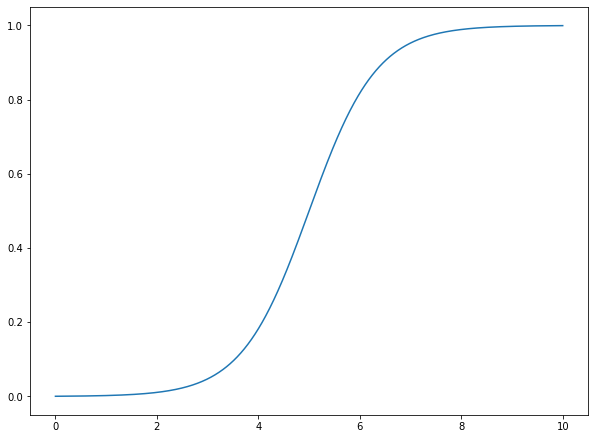

In [3]:
fig = plt.figure(figsize=(10.0, 7.5))
plt.plot(x, y)

W przypadku regresji logistycznej, zakłada się typowo że maksymalną wartością będzie zawsze $ 1 $, a więc znika jeden z parametrów. Dodatkowo zapisujemy równanie krzywej w odrobinę zmienionej postaci:

$$ f(x)={\frac {1}{1+e^{-(ax + b)}}} $$

Dzięki czemu funkcja ta, w dwóch wymiarach, ma dokładnie dwa parametry: $ a $ oraz $ b $. W fazie nauczania dobiera się takie parametry, które maksymalizują przynależność obiektów do odpowiednich klas.

## Nauczanie modelu regresji logistycznej

Stwórzmy sobie sztuczny zbiór danych, dla którego postaramy się nauczyć model regresji logistycznej.

In [4]:
import pandas as pd

In [5]:
x = np.geomspace(0.1, 10, 10)
y = (x > 5).astype(int)

xy_df = pd.DataFrame({
    "x": x,
    "y": y
})
xy_df.sample(n=5)

,x,y
7,3.593814,0
8,5.994843,1
6,2.154435,0
3,0.464159,0
2,0.278256,0


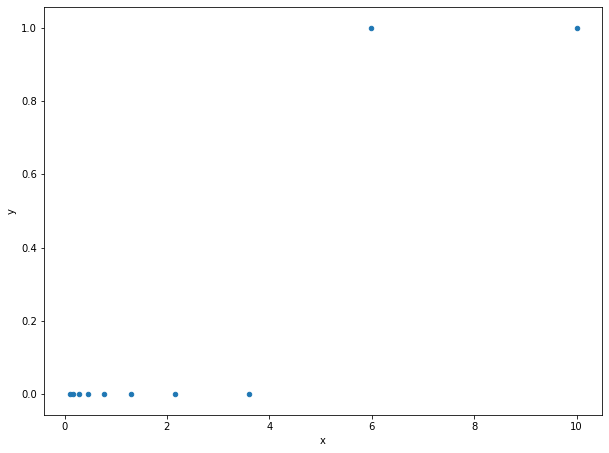

In [6]:
xy_df.plot.scatter(x="x", y="y", 
                   figsize=(10.0, 7.5))

Wykorzystamy regresję logistyczną dostępną w scikit-learn.

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression(penalty="none", verbose=1)
lr.fit(xy_df[["x"]], xy_df["y"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [9]:
lr.coef_, lr.intercept_

(array([[8.57192533]]), array([-40.64294743]))

In [10]:
test_x = np.linspace(0, 10, 1000).reshape(-1, 1)
probabilities = lr.predict_proba(test_x)
probabilities

array([[1.00000000e+00, 2.23353213e-18],
       [1.00000000e+00, 2.43364299e-18],
       [1.00000000e+00, 2.65168256e-18],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

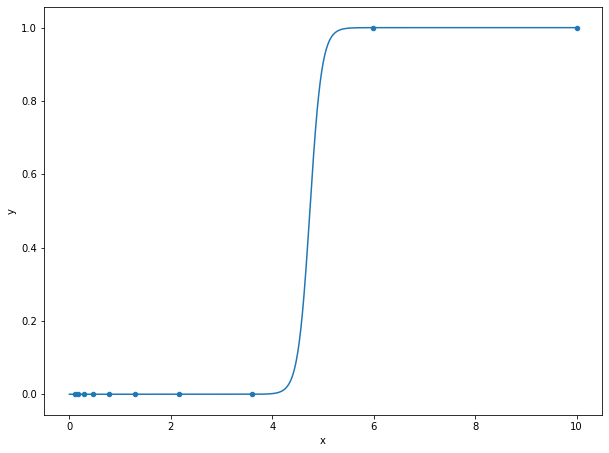

In [11]:
xy_df.plot.scatter(x="x", y="y", 
                   figsize=(10.0, 7.5))
plt.plot(test_x, probabilities[:, 1])

W przedstawionym przykładzie klasy były łatwo separowalne. Co jednak stanie się kiedy trochę zmodyfikujemy nasz zbiór, aby niektóre z obserwacji przynależały do przeciwnej klasy?

In [12]:
xy_df

,x,y
0,0.100000,0
1,0.166810,0
2,0.278256,0
3,0.464159,0
4,0.774264,0
5,1.291550,0
6,2.154435,0
7,3.593814,0
8,5.994843,1
9,10.000000,1


In [13]:
xy_df.at[3, "y"] = 1

In [14]:
lr = LogisticRegression(penalty="none", verbose=1, max_iter=11111)
lr.fit(xy_df[["x"]], xy_df["y"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=11111,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [15]:
probabilities = lr.predict_proba(test_x)
probabilities

array([[0.91880143, 0.08119857],
       [0.91836968, 0.08163032],
       [0.91793585, 0.08206415],
       ...,
       [0.03456992, 0.96543008],
       [0.03437776, 0.96562224],
       [0.03418663, 0.96581337]])

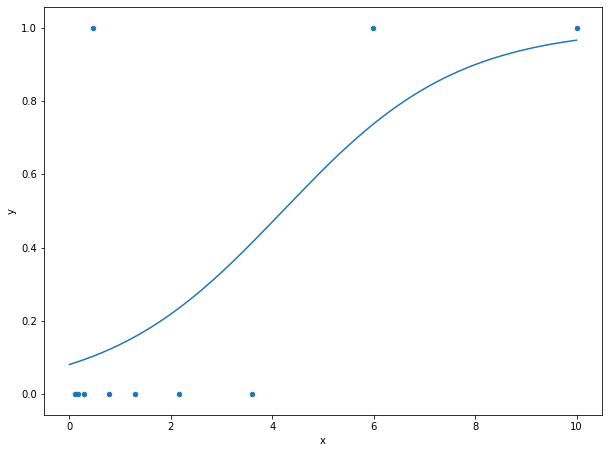

In [16]:
xy_df.plot.scatter(x="x", y="y", 
                   figsize=(10.0, 7.5))
plt.plot(test_x, probabilities[:, 1])

In [17]:
lr.coef_, lr.intercept_

(array([[0.57673083]]), array([-2.42617239]))

In [18]:
lr.predict(xy_df[["x"]])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])